In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Understanding

In [2]:
df1 = pd.read_csv("C:\\Users\\dell\\Desktop\\course_activity.csv")
df1.head()

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,5/1/2024,90,46.10
1,S001,DM101,28/01/2024,155,88.87
2,S001,UX303,28/01/2024,177,54.93
3,S002,PY202,3/2/2024,45,32.20
4,S002,UX303,15/03/2024,119,90.80


In [3]:
df2 = pd.read_csv("C:\\Users\\dell\\Desktop\\students.csv")
df2.head()

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,24/11/2023
1,S002,Student_2,32,Other,Chennai,27/02/2023
2,S003,Student_3,28,Other,Mumbai,13/01/2023
3,S004,Student_4,25,Female,Bangalore,21/05/2023
4,S005,Student_5,24,Other,Delhi,6/5/2023


In [4]:
df3 = pd.read_csv("C:\\Users\\dell\\Desktop\\feedback.csv")
df3.head()

,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             659 non-null    object 
 1   Course_ID              659 non-null    object 
 2   Date                   659 non-null    object 
 3   Time_Spent_Minutes     659 non-null    int64  
 4   Completion_Percentage  659 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 25.9+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Name            100 non-null    object
 2   Age             100 non-null    int64 
 3   Gender          100 non-null    object
 4   Location        100 non-null    object
 5   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Student_ID     80 non-null     object
 1   Course_ID      80 non-null     object
 2   Rating         80 non-null     int64 
 3   Feedback_Text  80 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.6+ KB


   - No missing values in any dataset.
   - Date (course activity), Enrolment_Date (students), are strings — need to convert to datetime.

#### Step 1: Data Cleaning & Preparation

In [8]:
# Convert dates to datetime
df1["Date"] = pd.to_datetime(df1["Date"], dayfirst=True, errors='coerce')
df2['Enrolment_Date'] = pd.to_datetime(df2['Enrolment_Date'], dayfirst=True, errors='coerce')

In [9]:
# Check for missing value df1 dataset
df1.isnull().sum()

Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64

In [10]:
# Check for missing value df2 dataset
df2.isnull().sum()

Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64

In [11]:
# Check for missing value df3 dataset
df3.isnull().sum()

Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64

 - No missing values in df1, df2 & df3 dataset.

In [12]:
# Check for duplicates in df1 dataset
df1.duplicated().sum()

0

In [13]:
# Check for duplicates in df2 dataset
df2.duplicated().sum()

0

In [14]:
# Check for duplicates in df3 dataset
df3.duplicated().sum()

0

 - No duplicates values in df1, df2 & df3 dataset.

#### Step 2: Exploratory Data Analysis (EDA)

In [15]:
# Merge datasets for EDA
merged_df = df1.merge(df2, on='Student_ID', how='left')
merged_df = merged_df.merge(df3, on=['Student_ID', 'Course_ID'], how='left')

In [16]:
merged_df

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage,Name,Age,Gender,Location,Enrolment_Date,Rating,Feedback_Text
0,S001,PY202,2024-01-05,90,46.10,Student_1,24,Female,Kolkata,2023-11-24,NaN,NaN
1,S001,DM101,2024-01-28,155,88.87,Student_1,24,Female,Kolkata,2023-11-24,NaN,NaN
2,S001,UX303,2024-01-28,177,54.93,Student_1,24,Female,Kolkata,2023-11-24,NaN,NaN
3,S002,PY202,2024-02-03,45,32.20,Student_2,32,Other,Chennai,2023-02-27,3.0,Well structured
4,S002,UX303,2024-03-15,119,90.80,Student_2,32,Other,Chennai,2023-02-27,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
654,S100,PY202,2024-03-03,83,22.63,Student_100,22,Other,Bangalore,2023-06-16,NaN,NaN
655,S100,UX303,2024-02-27,168,14.83,Student_100,22,Other,Bangalore,2023-06-16,NaN,NaN
656,S100,UX303,2024-01-02,134,22.29,Student_100,22,Other,Bangalore,2023-06-16,NaN,NaN
657,S100,WD404,2024-03-12,139,68.78,Student_100,22,Other,Bangalore,2023-06-16,NaN,NaN


In [17]:
# 1. Overall average completion rate across courses
avg_completion_rate = merged_df['Completion_Percentage'].mean()
avg_completion_rate

54.77871016691957

In [18]:
# 2. Courses with highest and lowest average engagement time
avg_time_by_course = merged_df.groupby('Course_ID')['Time_Spent_Minutes'].mean()
avg_time_by_course

Course_ID
DM101    102.427673
PY202     93.902439
UX303     99.816568
WD404     96.419162
Name: Time_Spent_Minutes, dtype: float64

In [19]:
highest_engagement_course = avg_time_by_course.idxmax(), avg_time_by_course.max()
highest_engagement_course

('DM101', 102.42767295597484)

In [20]:
lowest_engagement_course = avg_time_by_course.idxmin(), avg_time_by_course.min()
lowest_engagement_course

('PY202', 93.90243902439025)

In [21]:
# 3. Engagement by age group
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=[15, 25, 35, 50], labels=['15-25', '26-35', '36-50'])
avg_time_by_age = merged_df.groupby('Age_Group')['Time_Spent_Minutes'].mean()
avg_time_by_age

Age_Group
15-25    100.758929
26-35     95.362229
36-50           NaN
Name: Time_Spent_Minutes, dtype: float64

In [22]:
# 4. Average feedback rating per course
avg_rating_by_course = df3.groupby('Course_ID')['Rating'].mean()
avg_rating_by_course

Course_ID
DM101    2.900000
PY202    3.277778
UX303    2.923077
WD404    2.789474
Name: Rating, dtype: float64

In [23]:
# 5. Correlation between completion rate and feedback rating
correlation = merged_df[['Completion_Percentage', 'Rating']].corr().loc['Completion_Percentage', 'Rating']
correlation

-0.05170765814948298

In [24]:
# 6. Top 3 student segments based on engagement & satisfaction
engagement_satisfaction = merged_df.groupby('Student_ID').agg({
    'Time_Spent_Minutes': 'mean',
    'Completion_Percentage': 'mean',
    'Rating': 'mean'
}).sort_values(by=['Time_Spent_Minutes', 'Completion_Percentage', 'Rating'], ascending=False).head(3)
engagement_satisfaction

,Time_Spent_Minutes,Completion_Percentage,Rating
Student_ID,,,
S075,154.000000,65.753333,1.0
S042,147.666667,52.927778,1.0
S051,147.600000,44.122000,2.0


#### Step 3: Visualizations

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


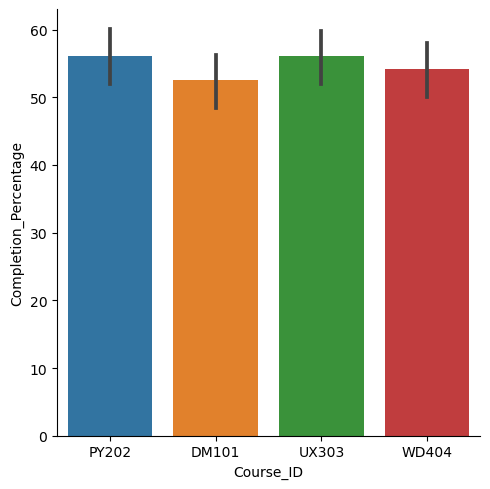

In [25]:
# 1. Average Completion Percentage by Course
sns.catplot(x="Course_ID",y="Completion_Percentage",data=merged_df,kind ="bar")
plt.show()

Text(0, 0.5, 'Time Spent (Minutes)')

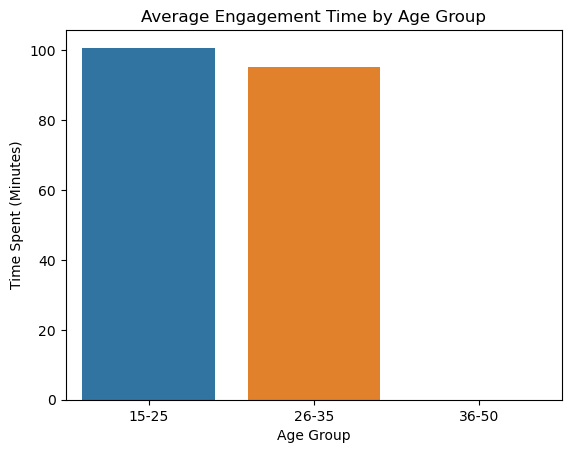

In [26]:
# 2. Engagement Time by Age Group
sns.barplot(x=avg_time_by_age.index, y=avg_time_by_age.values)
plt.title("Average Engagement Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Time Spent (Minutes)")

Text(0, 0.5, 'Average Rating')

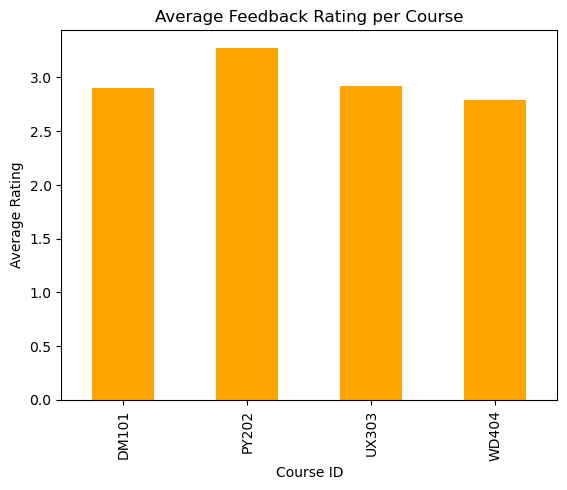

In [27]:
# 3. Average Feedback Rating per Course
avg_rating_by_course.plot(kind='bar', color='orange')
plt.title("Average Feedback Rating per Course")
plt.xlabel("Course ID")
plt.ylabel("Average Rating")

Text(0, 0.5, 'Rating')

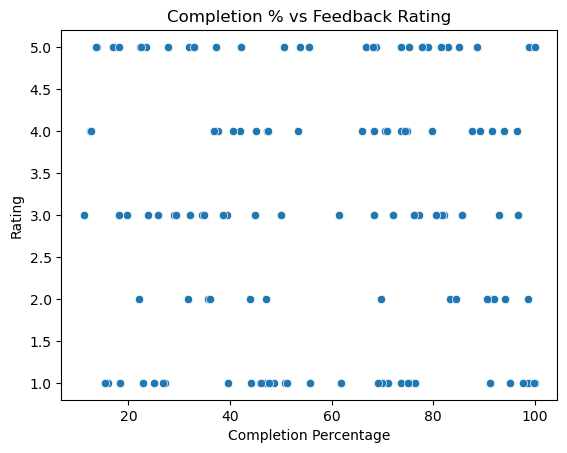

In [28]:
# 4. Correlation between Completion % and Rating (Scatter)
sns.scatterplot(data=merged_df, x='Completion_Percentage', y='Rating')
plt.title("Completion % vs Feedback Rating")
plt.xlabel("Completion Percentage")
plt.ylabel("Rating")

Text(0.5, 0, 'Course ID')

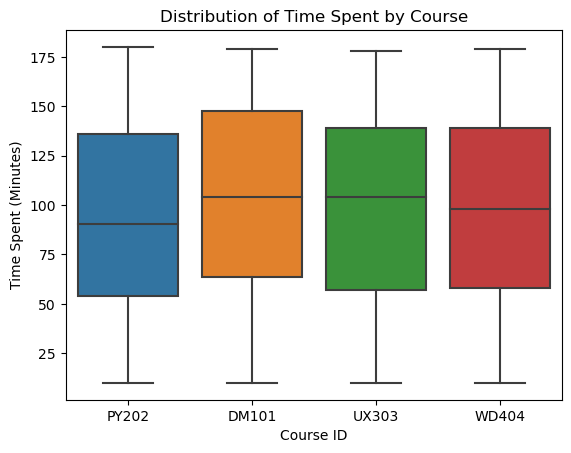

In [29]:
# 5. Time Spent Distribution by Course
plt.figure()
sns.boxplot(data=merged_df, x='Course_ID', y='Time_Spent_Minutes')
plt.title("Distribution of Time Spent by Course")
plt.ylabel("Time Spent (Minutes)")
plt.xlabel("Course ID")